(3, 3)
(175, 258)


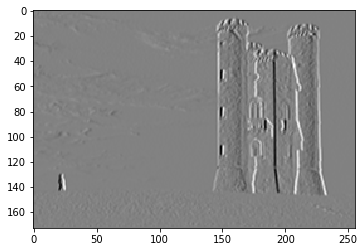

(3, 3)
(175, 258)


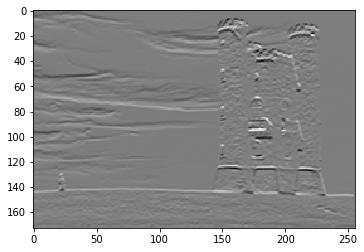

(11, 11)
(183, 266)


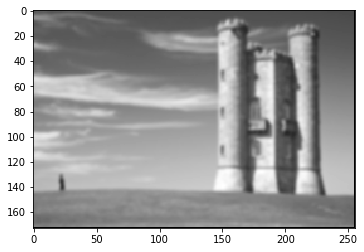

(5, 5)
(177, 260)


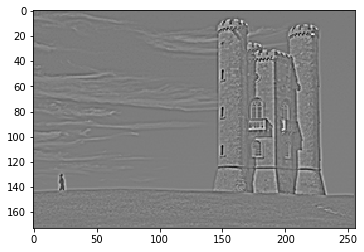

(3, 3)
(175, 258)


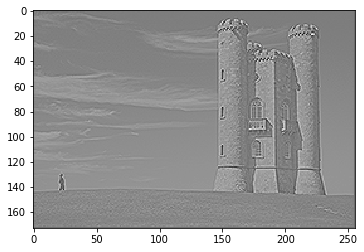

(3, 3)
(171, 302)
(3, 3)
(171, 302)


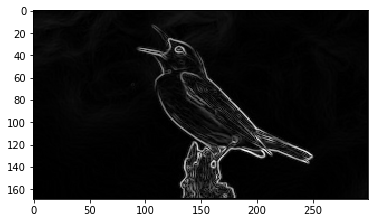

In [31]:
import numpy as np
import matplotlib.image as mpimage
import matplotlib.pyplot as plt

# show plot first run
%matplotlib inline 
# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

def show_image(img):
    """
    Shows an image (img) using matplotlib
    """
    if isinstance(img, np.ndarray):
        if img.shape[-1] == 3 or img.shape[-1] == 4:
            plt.imshow(img[...,:3])
        if img.shape[-1] == 1 or img.shape[-1] > 4:
            plt.imshow(img[:,:], cmap="gray")
        plt.show()


def convolution2D(img, kernel):
    """
    Computes the convolution between kernel and image

    :param img: grayscale image
    :param kernel: convolution matrix
    :return: result of the convolution
    """
    
    # 1.1.1 TODO. Initialisieren Sie das resultierende Bild
    # Codebeispiel: new_img = np.zeros(img.shape)
    newimg = np.zeros(img.shape)
    newimg = newimg.astype("float64")
    
    if img.ndim!=2:
        print ('convolution_2d: only 2 dim images are supported')
        return newimg
    
    # 1.1.2 TODO. Implementieren Sie die Faltung.
    # Achtung: die Faltung (convolution) soll mit beliebig großen Kernels funktionieren.
    # Tipp: Nutzen Sie so gut es geht Numpy, sonst dauert der Algorithmus zu lange.
    # D.h. Iterieren Sie nicht über den Kernel, nur über das Bild. Der Rest geht mit Numpy.

    # Achtung! Achteten Sie darauf, dass wir ein Randproblem haben. Wie ist die Faltung am Rand definiert?
    # Tipp: Es gibt eine Funktion np.pad(Matrix, 5, mode="edge") die ein Array an den Rändern erweitert.

    offset = int(kernel.shape[0])
    # copy input image to larger with padded edges
    workimg = np.pad(img, int(offset/2), mode="edge")
    
    print(kernel.shape)
    print(workimg.shape)
    
    #rk, ck = kernel.shape[:2]
    ri, ci = workimg.shape[:2]
    
    for r in range (ri-offset): # here rows of image
        for c in range (ci-offset): # here columns of image
            # slice out kernel sized section
            newimg[r,c] = np.sum(workimg[r:r+offset,c:c+offset] * kernel)   

    # 1.1.3 TODO. Returnen Sie das resultierende "Bild"/Matrix
    # Codebeispiel: return newimg      
    return newimg
    
def make_gaussian(size, fwhm = 3, center=None):
    # stolen from Learning from images, author: Kristian Hildebrand
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]
    
    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    k = np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)
    return k / np.sum(k) 

def magnitude_of_gradients(RGB_img):
    """
    Computes the magnitude of gradients using x-sobel and y-sobel 2Dconvolution

    :param img: RGB image
    :return: length of the gradient
    """
    # 3.1.1 TODO. Wandeln Sie das RGB Bild in ein grayscale Bild um.
    img = RGB_img.astype("float64")
    # Wandelt RGB Bild in ein grayscale Bild um
    gray = img[...,:3]@np.array([0.299, 0.587, 0.114])
    # 3.1.2 TODO: Definieren Sie den x-Sobel Kernel und y-Sobel Kernel.
    sobelmask_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobelmask_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    # 3.1.3 TODO: Nutzen Sie sie convolution2D Funktion um die Gradienten in x- und y-Richtung zu berechnen.
    sobx = convolution2D(gray, sobelmask_x)
    soby = convolution2D(gray, sobelmask_y)
    # 3.1.4 TODO: Nutzen Sie die zwei resultierenden Gradienten um die gesammt Gradientenlängen an jedem Pixel auszurechnen.
    mog = np.sqrt(sobx*sobx + soby*soby)
    return mog

# Diese if Abfrage (if __name__ == '__main__':) sorgt dafür, dass der Code nur
# ausgeführt wird, wenn die Datei (mog.py) per python/jupyter ausgeführt wird ($ python mog.py).
# Solltet Ihr die Datei per "import mog" in einem anderen Script einbinden, wird dieser Code übersprungen.
if __name__ == '__main__':
    # Bild laden und zu float konvertieren
    img = mpimage.imread('bilder/tower.jpg')
 
    img = img.astype("float64")

    # Wandelt RGB Bild in ein grayscale Bild um
    gray = img[...,:3]@np.array([0.299, 0.587, 0.114])
    
    # padding test
    #print(gray.shape)
    #show_image(gray)
    #new = np.pad(gray, 5, mode="edge")
    #print(new.shape)
    #show_image(new)
    
    # Aufgabe 1.
    # 1.1 TODO: Implementieren Sie die convolution2D Funktion (oben)
    #done see above

    # Aufgabe 2.
    # 2.1 TODO: Definieren Sie mindestens 5 verschiedene Kernels (darunter sollten beide Sobel sein) und testen Sie sie auf dem grayscale Bild indem Sie convolution2D aufrufen.
    # 2.2 TODO: Speichern Sie alle Resultate als Bilder (sehe Tipp 2). Es sollten 5 Bilder sein.
    # Kernel: sobel x o. y [3,3]
    sobelmask_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobelmask_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    # Kernel: gauss [11,11]
    gausskernel = make_gaussian(11)
    # Kernel: sharpen [5,5]
    sharpkernel = np.ones((5,5))
    sharpkernel *= -1
    sharpkernel[2,2] = 25
    #print(sharpkernel)
    # Kernel: outline [3,3]
    outlineker = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    sobx = convolution2D(gray, sobelmask_x)
    show_image(sobx)
    mpimage.imsave("ex4_sobelx.png", sobx, cmap="gray")
    soby = convolution2D(gray, sobelmask_y)
    show_image(soby)
    mpimage.imsave("ex4_sobely.png", soby, cmap="gray")
    filtered = convolution2D(gray, gausskernel)
    show_image(filtered)
    mpimage.imsave("ex4blurr.png", filtered, cmap="gray")
    filtered = convolution2D(gray, sharpkernel)
    show_image(filtered)
    mpimage.imsave("ex4sharpen.png", filtered, cmap="gray")
    filtered = convolution2D(gray, outlineker)
    show_image(filtered)
    mpimage.imsave("ex4_outline.png", filtered, cmap="gray")
    
    # Aufgabe 3:
    # 3.1 TODO: Implementieren Sie die magnitude_of_gradients Funktion (oben) und testen Sie sie mit dem RGB Bild.
    # 3.2 TODO: Speichern Sie das Resultat als Bild (sehe Tipp 2).
    RGB_img = mpimage.imread('bilder/bird.jpg')
    mog = magnitude_of_gradients(RGB_img)
    show_image(mog)
    mpimage.imsave("ex4_magnitudeograd-bird.png", mog, cmap="gray")
    # ------------------------------------------------
    # Nützliche Funktionen:
    # ------------------------------------------------
    # Tipp 1: So können Sie eine Matrix als Bild anzeigen:
    # show_image(gray)

    # Tipp 2: So können Sie eine NxMx3 Matrix als Bild speichern:
    # mpimage.imsave("test.png", img)
    # und so können Sie eine NxM Matrix als grayscale Bild speichern:
    # mpimage.imsave("test.png", gray, cmap="gray")
